# Big Mark Sales prediction 
- It is a Regression problem.
- Will estimate the sales with the available features.

In [1]:
#Importing all the required libraries
import pandas as pd                #for reading csv
import numpy as np
import matplotlib.pyplot as plt    #for visualization
import seaborn as sns

import warnings                    #to avoid warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split  #for splitting data set to train and test
# libraries for Machine Learning Models
from sklearn.linear_model import LinearRegression    
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import GridSearchCV    # for hypertuning of Machine Learning models
from sklearn.metrics import mean_squared_error #calculating MSE
from sklearn.metrics import r2_score 
import joblib   #save the model for later

In [95]:
data = pd.read_csv("/Users/ansu/ML_Luminar/Dataset/Project_Dataset/train.csv")
data_backup = data.copy()       #creating a copy of train data
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Exploratory Data Analysis

In [3]:
data.shape                      # No of rows and colums 

(8523, 12)

In [4]:
data.describe()                #satistical projection of data 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


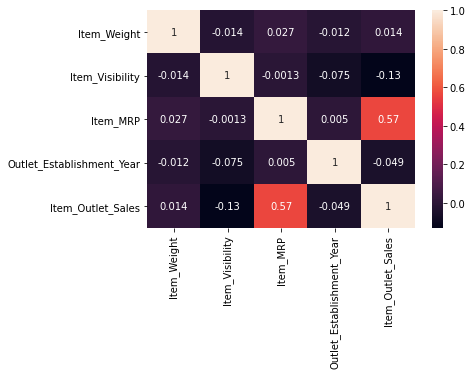

In [5]:
#Correlation Matrix to check the correlation with the independent and dependent variables
data_correlation = data.corr()
sns.heatmap(data_correlation,annot = True)

Here we can see the correlation of the independent variable 'Item_Outlet_Sales' has good correlation with 'Item_MRP' and least correlation with 'Item_Weight','Item_Visibility' and 'Outlet_Establishment_Year'

In [6]:
data_correlation['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [7]:
data.dtypes                              #To find the data type of the columns 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Histogram of the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12565a250>,
      dtype=object)

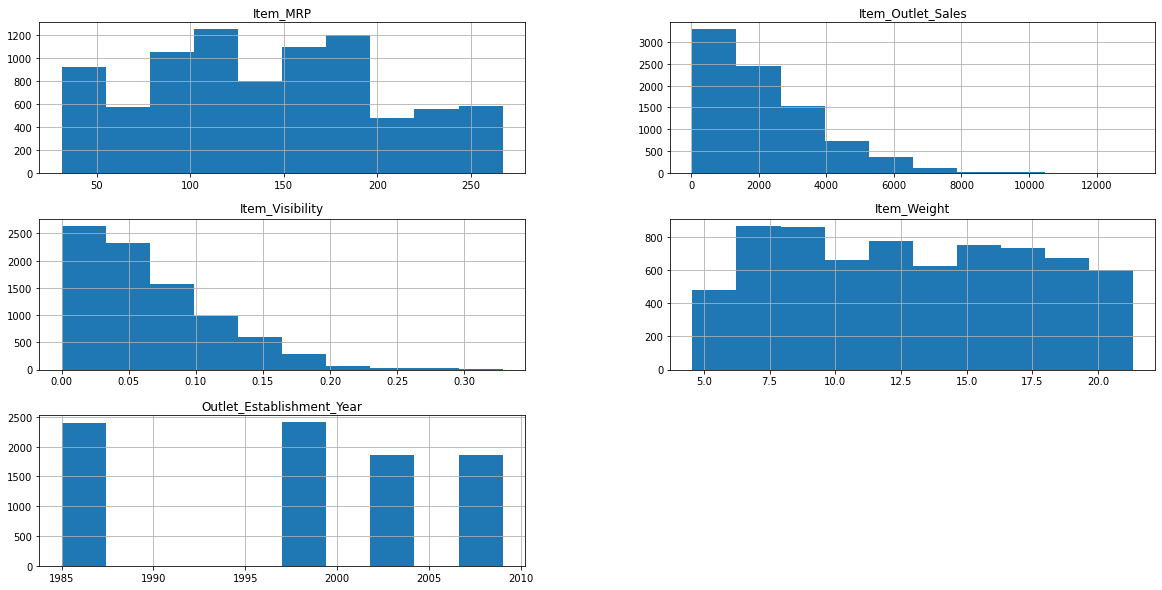

In [8]:
data.hist(figsize = (20,10))

# Visualization of the Data w.r.t independent feature 

<BarContainer object of 8523 artists>

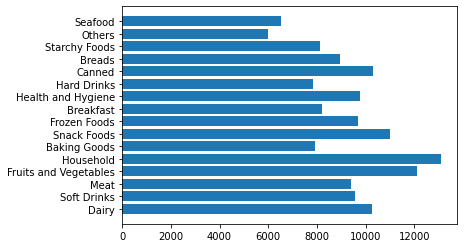

In [9]:
x=data.groupby('Item_Type')
plt.barh(data['Item_Type'],data['Item_Outlet_Sales'])

Text(0, 0.5, 'Item_Outlet_Sales')

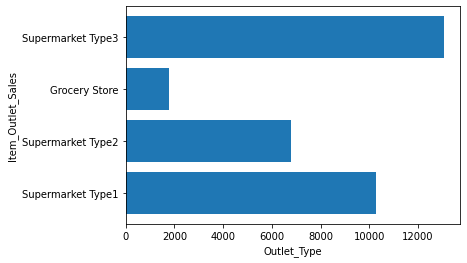

In [10]:
plt.barh(data['Outlet_Type'],data['Item_Outlet_Sales'],align='center',alpha=1)
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')

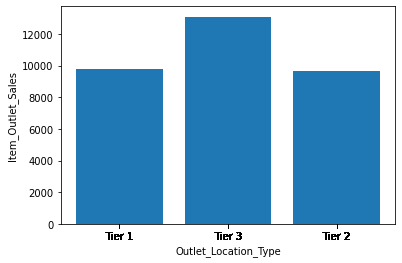

In [11]:
plt.bar(data['Outlet_Location_Type'],data['Item_Outlet_Sales'],align='center',alpha=1)
plt.xticks(data['Outlet_Location_Type'])
# plt.yticks(data['Item_Outlet_Sales'])
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

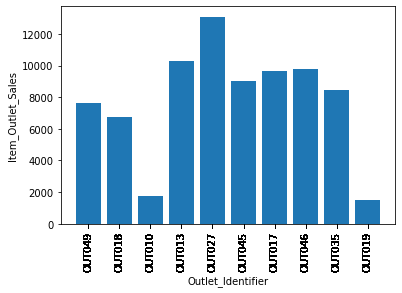

In [12]:
plt.bar(data['Outlet_Identifier'],data['Item_Outlet_Sales'],align='center',alpha=1)
plt.xticks(data['Outlet_Identifier'],rotation=90)
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In [13]:
#EDA process
#Object columns are separated 
object_columns = data.dtypes[data.dtypes=='object'].index
object_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
#float columns are separated
float_columns = data.dtypes[data.dtypes=='float64'].index
float_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [15]:
# Here 'Item_Fat_Content' has 5 different values, which we will replace with Low Fat and Regular
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
#Replacing with Low Fat
data['Item_Fat_Content']= data['Item_Fat_Content'].replace(to_replace =['LF','low fat'],value='Low Fat')

In [17]:
#Replacing with Regular
data['Item_Fat_Content']= data['Item_Fat_Content'].replace(to_replace =['reg'],value='Regular')

In [18]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
data['Item_Identifier'].nunique()

1559

In [20]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDU12     9
FDO19     9
FDT07     9
         ..
FDT35     1
FDK57     1
FDY43     1
FDQ60     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

# Check for Duplicates

In [21]:
data[data.duplicated(keep=False)].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Missing Value Handling

In [22]:
# To check for null values 
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
data[data['Outlet_Size'].isnull()]
# Tier3 Grocery Store   - null values 
# Tier 2 Supermarket Type1 - null values (check in excel)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [24]:
data.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

In [25]:
# Replacing null Grocery Store with 'Small'
#Replacing null Supermarket Type1 with Medium

o_type = data['Outlet_Type']
for x in o_type:
    if (x =='Grocery Store'):
        data['Outlet_Size']= data['Outlet_Size'].replace(to_replace ='NaN',value='Small')
    elif x =='Supermarket Type1':
        data['Outlet_Size']= data['Outlet_Size'].replace(to_replace ='NaN',value='Small')
    

# Outliers - checking for outliers using boxplot and removing the outliers

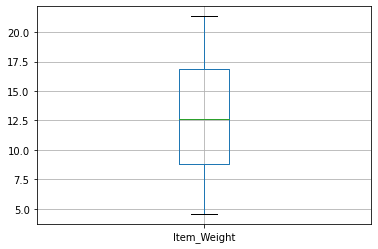

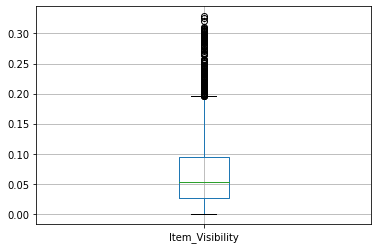

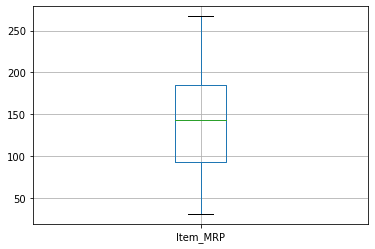

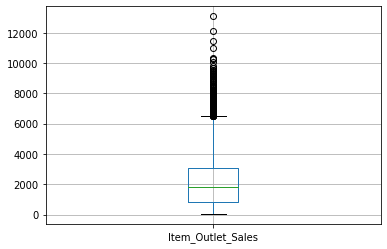

In [26]:
for column in float_columns:
    plt.figure()
    data.boxplot([column])

# to plot blot 
# for column in float_columns:
#     data.plot(kind='box', figsize=(20,10))

From the above Boxplot we infer there are outliers for the 'Item_Outlet_Sales'and 'Item_Visibility'. We should remove the outliers of 'Item_Outlet_Sales'. We are dropping the Item_Visibility column as the correlation is very low.

In [27]:
#Removing Outlier of the 'Item_Outlet_Sales' column
sales = data['Item_Outlet_Sales'].describe()

IQR= sales['75%']-sales['25%']
UT = sales['75%']+1.5*IQR
UT

6501.8699

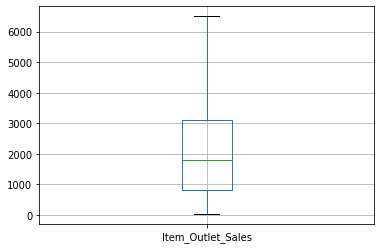

In [28]:
data['Item_Outlet_Sales'][data['Item_Outlet_Sales']>UT]=UT
data.boxplot('Item_Outlet_Sales')        #outlier of Item_Outlet_Sales is replaced with UT

# Dropping unwanted columns from the dataset

In [29]:
data = data.drop(['Item_Visibility','Item_Weight','Outlet_Establishment_Year'],axis=1)

# One Hot encoding 

In [30]:
object_columns 

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [31]:
print("Item_Identifier",data['Item_Identifier'].nunique())
print("Item_Fat_Content",data['Item_Fat_Content'].nunique())
print("Item_Type",data['Item_Type'].nunique())
print("Outlet_Identifier",data['Outlet_Identifier'].nunique())
print("Outlet_Size",data['Outlet_Size'].nunique())
print("Outlet_Location_Type",data['Outlet_Location_Type'].nunique())
print("Outlet_Type",data['Outlet_Type'].nunique())

Item_Identifier 1559
Item_Fat_Content 2
Item_Type 16
Outlet_Identifier 10
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4


In [32]:
data =pd.get_dummies(data, columns=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size",\
                               "Outlet_Location_Type","Outlet_Type"]\
                     , prefix=["Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size",\
                               "Outlet_Location_Type","Outlet_Type"])

In [33]:
data.shape

(8523, 41)

# Test Data - Import Test data and do the same EDA

In [34]:
test_data = pd.read_csv("/Users/ansu/ML_Luminar/Dataset/Project_Dataset/test.csv")
test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [35]:
testdata_copy = test_data.copy()

In [36]:
test_data.shape                      #Rows and Columns 

(5681, 11)

In [37]:
test_data.describe()                #satistical projection of data 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [38]:
test_data.dtypes                    #Dataypes of columns

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [39]:
#Object columns are separated 
object_columns_test= test_data.dtypes[test_data.dtypes=='object'].index
object_columns_test

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [40]:
#float columns are separated
float_columns_test = test_data.dtypes[test_data.dtypes=='float64'].index
float_columns_test

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [41]:
# Here 'Item_Fat_Content' has 5 different values, which we will replace with Low Fat and Regular
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [42]:
#Replacing with Low Fat
test_data['Item_Fat_Content']= test_data['Item_Fat_Content'].replace(to_replace =['LF','low fat'],value='Low Fat')
#Replacing with Regular
test_data['Item_Fat_Content']= test_data['Item_Fat_Content'].replace(to_replace =['reg'],value='Regular')

In [43]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [44]:
#Checking for Duplicates  ------no missing values
test_data[test_data.duplicated(keep=False)].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [45]:
# To check for null values 
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [46]:
test_data[test_data['Outlet_Size'].isnull()]
# Tier3 Grocery Store   - null values 
# Tier 2 Supermarket Type1 - null values (check in excel)

# Replacing null Grocery Store with 'Small'
#Replacing null Supermarket Type1 with Small
o_type =test_data['Outlet_Type']
for x in o_type:
    if (x =='Grocery Store'):
        test_data['Outlet_Size']= test_data['Outlet_Size'].replace(to_replace ='NaN',value='Small')
    elif x =='Supermarket Type1':
        test_data['Outlet_Size']= test_data['Outlet_Size'].replace(to_replace ='NaN',value='Small')

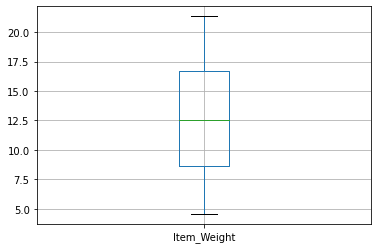

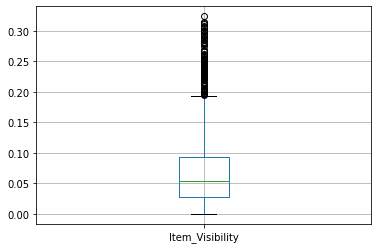

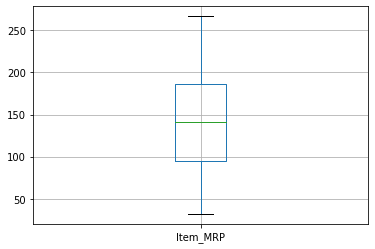

In [47]:
#Checking for OUTLIERS - using boxplot 
for column in float_columns_test:
    plt.figure()
    test_data.boxplot([column])

In [48]:
#Dropping unwanted columns
test_data = test_data.drop(['Item_Visibility','Item_Weight','Outlet_Establishment_Year'],axis=1)

In [49]:
test_data = test_data.drop('Item_Identifier',axis=1)

In [50]:
#One Hot Encoding 
test_data =pd.get_dummies(test_data, columns=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size",\
                               "Outlet_Location_Type","Outlet_Type"]\
                     , prefix=["Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size",\
                               "Outlet_Location_Type","Outlet_Type"])

In [51]:
test_data.shape

(5681, 39)

# Splitting the data as X and Y

In [52]:
X = data.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y = data['Item_Outlet_Sales']

# Splitting data for train and test

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

# Linear Regression Model

In [54]:
linear_reg = LinearRegression()           #creating LinearRegression class object and fitting the train data
linear_reg.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred_test = linear_reg.predict(X_test)
MSE_lr = mean_squared_error(y_test,y_pred_test)
RMSE_lr =np.sqrt(MSE_lr)
print("Root Mean Squared Error of Linear Regression:",RMSE_lr)

Root Mean Squared Error of Linear Regression: 1022.9000213095405


In [56]:
y_pred_train = linear_reg.predict(X_train)
MSE_training_lr = mean_squared_error(y_train,y_pred_train)
RMSE_training_lr = np.sqrt(MSE_training_lr)
print("Root Mean Squared Error of Training- Linear Regression:",RMSE_training_lr)

Root Mean Squared Error of Training- Linear Regression: 1068.2441008282267


# Ridge Regression

In [57]:
ridge = Ridge()                          #creating object of Ridge Regressor

In [58]:
#hyper tuning parameters of GridSearchCV
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
solver=['auto','svd','sag']
parameters = {'alpha': alpha,'solver':solver}

ridge_gridcv = GridSearchCV(ridge,parameters,cv=5)
ridge_gridcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30],
                         'solver': ['auto', 'svd', 'sag']})

In [59]:
#list of paramters available for GridSearchCV
ridge_gridcv.get_params().keys() 

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__max_iter', 'estimator__normalize', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [60]:
#Best parameters 
ridge_gridcv.best_params_

{'alpha': 5, 'solver': 'sag'}

In [61]:
#Retraining the ridge regressor with best parameters
ridge=Ridge(alpha=10,solver='sag')
ridge.fit(X_train,y_train)

Ridge(alpha=10, solver='sag')

In [62]:
#prediction of y values and calculating the error
y_pred_ridge=ridge.predict(X_test)
MSE_ridge = mean_squared_error(y_pred_ridge,y_test)
RMSE_ridge = np.sqrt(MSE_ridge)
print("Root Mean Squared Error Ridge Regressor:",RMSE_ridge)

Root Mean Squared Error Ridge Regressor: 1021.5007638145305


# Lasso Regression

In [63]:
lasso = Lasso()                             #creating object of Lasso Regressor

In [64]:
#hyper tuning parameters of GridSearchCV
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
parameters = {'alpha': alpha}

lasso_gridcv = GridSearchCV(lasso,parameters,cv=5)
lasso_gridcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [65]:
#Best parameters 
lasso_gridcv.best_params_

{'alpha': 5}

In [66]:
#Retraining the Lasso regressor with best parameters
lasso=Lasso(alpha=5)
lasso.fit(X_train,y_train)

Lasso(alpha=5)

In [67]:
#prediction of y values and calculating the error
y_pred_lasso=lasso.predict(X_test)
MSE_lasso = mean_squared_error(y_pred_lasso,y_test)
RMSE_lasso = np.sqrt(MSE_lasso)
print("Root Mean Squared Error Lasso Regressor:",RMSE_lasso)

Root Mean Squared Error Lasso Regressor: 1021.1147863662823


# ElasticNet Regression

In [68]:
elastic = ElasticNet()                            #creating object of ElasticNet Regressor

In [69]:
#hyper tuning parameters of GridSearchCV
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
parameters = {'alpha': alpha}

elastic_gridcv = GridSearchCV(elastic, parameters,cv=5)
elastic_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [70]:
#Best parameters 
elastic_gridcv.best_params_

{'alpha': 0.01}

In [71]:
#Retraining the elasticnet regressor with best parameters
elastic = ElasticNet(alpha=0.01) 
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.01)

In [72]:
#prediction of y values and calculating the error
y_pred_elastic=elastic.predict(X_test)
MSE_elastic = mean_squared_error(y_pred_elastic,y_test)
RMSE_elastic = np.sqrt(MSE_elastic)
print("Root Mean Squared Error ElasticNet Regressor:",RMSE_elastic)

Root Mean Squared Error ElasticNet Regressor: 1022.2708139914947


# RandomForest Regression

In [73]:
random_forest = RandomForestRegressor()                #creating object of RandomForest Regressor

In [74]:
#hyper tuning parameters of GridSearchCV
n_estimators=[20,30,40,50,60,75,100]
criterion=['mse']
max_depth=[3,5,10]
random_state = [42]
parameters={'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,'random_state':random_state}

radom_forest_gridcv = GridSearchCV(random_forest, parameters)
radom_forest_gridcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 5, 10],
                         'n_estimators': [20, 30, 40, 50, 60, 75, 100],
                         'random_state': [42]})

In [75]:
#Best parameters 
radom_forest_gridcv.best_params_

{'criterion': 'mse', 'max_depth': 5, 'n_estimators': 60, 'random_state': 42}

In [76]:
#Retraining the RandomForest regressor with best parameters
random_forest = RandomForestRegressor(criterion= 'mse',max_depth =5,n_estimators =60,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=42)

In [78]:
#prediction of y values and calculating the error
y_pred_randomforest = random_forest.predict(X_test)
MSE_random_forest = mean_squared_error(y_pred_randomforest,y_test)
RMSE_random_forest = np.sqrt(MSE_random_forest)
print("r2 score for Random Forest:",r2_score(y_pred_randomforest,y_test))
print("Root Mean Squared Error RandomForest Regressor:",RMSE_random_forest)

r2 score for Random Forest: 0.3961958474288553
Root Mean Squared Error RandomForest Regressor: 981.7494780566408


# XGBoost Regresser

In [79]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 200)    
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
#prediction of y values and calculating the error
y_pred_xgboost = xg_reg.predict(X_test)
MSE_xgboost= mean_squared_error(y_pred_xgboost,y_test)
RMSE_xgboost = np.sqrt(MSE_xgboost)
print("Root Mean Squared Error XGBoost Regressor:",RMSE_xgboost)

Root Mean Squared Error XGBoost Regressor: 991.3272399121147


K-Fold using XGBoost

In [81]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [82]:
type(data_dmatrix)

xgboost.core.DMatrix

In [83]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=5000,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2506.144287,18.511761,2506.353516,41.065861
1,2336.871989,30.262233,2337.153402,28.455241
2,2168.583171,40.067390,2169.531983,22.730141
3,2046.150472,41.341191,2047.370361,19.223365
4,1937.043253,42.372026,1938.812012,18.745214
...,...,...,...,...
123,961.611104,11.058533,1024.913615,19.252138
124,961.279460,11.311808,1024.940023,19.195306
125,960.764058,11.553052,1024.885356,19.143462
126,960.704285,11.543160,1024.972636,19.130516


# Error Dictionary to compare RMSE

In [84]:
ErrorDictionary ={'Linear Regression': RMSE_lr,
                 'Ridge Regression':RMSE_ridge,
                 'Lasso Regression':RMSE_lasso,
                 'ElasticNet Regression:':RMSE_elastic,
                 'RandomForest Regression:':RMSE_random_forest,
                 'XGBoost:':RMSE_xgboost}
ErrorDictionary

{'Linear Regression': 1022.9000213095405,
 'Ridge Regression': 1021.5007638145305,
 'Lasso Regression': 1021.1147863662823,
 'ElasticNet Regression:': 1022.2708139914947,
 'RandomForest Regression:': 981.7494780566408,
 'XGBoost:': 991.3272399121147}

# Here we can see that RandomForest Regression Model has the least Root Mean Squared Error, so we select RandomForest Model as our final model.

In [85]:
# pickle file is used to save the model for later use
joblib.dump(random_forest,'BigMartPrediction.pkl')

['BigMartPrediction.pkl']

In [86]:
#loading the final model
Final_model=joblib.load('BigMartPrediction.pkl')

In [87]:
# Predicting values of test_data with final model
predict_test_data = Final_model.predict(test_data)
predict_test_data

array([1561.94127671, 1453.24299778,  545.54647454, ..., 1992.58869121,
       3418.50621614, 1337.45483516])

In [88]:
new_df=pd.DataFrame({'Predicted_ItemOutlet_Sales':predict_test_data})
new_df

,Predicted_ItemOutlet_Sales
0,1561.941277
1,1453.242998
2,545.546475
3,2483.455949
4,5429.714296
...,...
5676,2061.791197
5677,2805.155786
5678,1992.588691
5679,3418.506216


In [89]:
new_df['Predicted_ItemOutlet_Sales'].isna().sum()

0

In [90]:
dataset_test = testdata_copy.copy()
dataset_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [91]:
Bigmarkt_df =pd.concat([dataset_test,new_df],axis=1)
Bigmarkt_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_ItemOutlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1561.941277
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1453.242998
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,545.546475
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2483.455949
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5429.714296
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2061.791197
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2805.155786
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1992.588691
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3418.506216


In [92]:
Bigmarkt_df['Actual_ItemOutlet_Sales'] = data['Item_Outlet_Sales']
Bigmarkt_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_ItemOutlet_Sales,Actual_ItemOutlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1561.941277,3735.1380
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1453.242998,443.4228
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,545.546475,2097.2700
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2483.455949,732.3800
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5429.714296,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2061.791197,4436.8912
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2805.155786,6088.0752
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1992.588691,2025.3636
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3418.506216,2596.6200


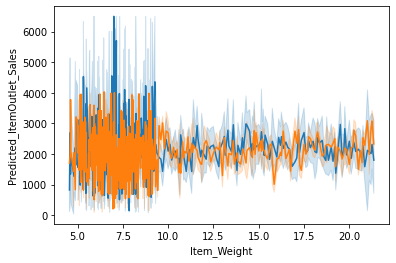

In [93]:
sns.lineplot(x='Item_Weight', y='Actual_ItemOutlet_Sales',data=Bigmarkt_df)
sns.lineplot(x='Item_Weight',y='Predicted_ItemOutlet_Sales',data=Bigmarkt_df)